#### Question 5

In [1]:
import vugrad as vg
import numpy as np

In [2]:
x = vg.TensorNode(np.random.randn(2,2))
print(x)

TensorNode[size (2, 2), source None].


In [3]:
a = vg.TensorNode(np.random.randn(2,2))
b = vg.TensorNode(np.random.randn(2,2))

In [4]:
c = a + b
print(c)

TensorNode[size (2, 2), source <class 'vugrad.core.Add'>].


In [7]:
print("c.value: ", c.value)
print("c.source: ", c.source)
print("c.source.inputs[0].value: ", c.source.inputs[0].value)
print("a.grad: ", a.grad)

c.value:  [[-0.76103098  0.67335456]
 [-0.02258363  0.13372542]]
c.source:  <vugrad.core.OpNode object at 0x0000023DD05A9CD0>
c.source.inputs[0].value:  [[-0.49295679 -0.24268526]
 [ 0.84223758  0.59818943]]
a.grad:  [[0. 0.]
 [0. 0.]]


#### PyTorch Installation and Testing

In [1]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ---------------------------------------- 0.0/2.4 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.4 GB 18.9 MB/s eta 0:02:10
     ---------------------------------------- 0.0/2.4 GB 25.9 MB/s eta 0:01:35
     ---------------------------------------- 0.0/2.4 GB 32.1 MB/s eta 0:01:16
     ---------------------------------------- 0.0/2.4 GB 36.7 MB/s eta 0:01:06
      --------------------------------------- 0.0/2.4 GB 39.6 MB/s eta 0:01:01
      --------------------------------------- 0.0/2.4 GB 41.3 MB/s eta 0:00:59
      --------------------------------------- 0.1/2.4 GB 42.6 MB/s eta 0:00:57
     - -------------------------------------- 0.1/2.4 GB 43.6 MB/s eta 0:00:55
     - -------------------------------------- 0.1/2.4 GB 44.3 MB/s eta 0:00:54
     - -------------------------------------- 0.1/2.4 GB 45.1 MB/s eta 0:00:53
     - -------------------------------------- 0.1/2.4 GB 45.2 MB/s eta 0:00:52
 


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import torch

In [2]:
print("Using torch", torch.__version__)

Using torch 2.5.1+cu121


In [3]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? True


In [4]:
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA version: {torch.version.cuda}")
print(f"Is CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU Device: {torch.cuda.get_device_name(0)}")

PyTorch version: 2.5.1+cu121
CUDA version: 12.1
Is CUDA available: True
GPU Device: NVIDIA GeForce RTX 2060


In [5]:
import sys
print("Python executable:", sys.executable)
print("Python version:", sys.version)

Python executable: c:\Users\abkol\AppData\Local\Programs\Python\Python310\python.exe
Python version: 3.10.6 (tags/v3.10.6:9c7b4bd, Aug  1 2022, 21:53:49) [MSC v.1932 64 bit (AMD64)]


In [10]:
# In command prompt/terminal
!nvidia-smi

Mon Nov 25 18:52:55 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.14                 Driver Version: 566.14         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2060      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   51C    P0             22W /   80W |       0MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

#### Question 11

In [8]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [7]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


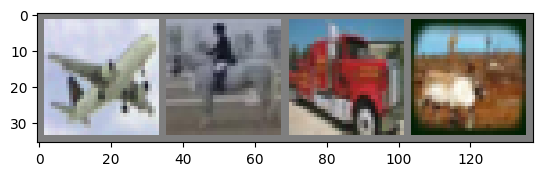

plane horse truck deer 


In [9]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [10]:
# Define a Convolutional Neural Network
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [11]:
# Define a Loss function and optimizer
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Let's use a Classification Cross-Entropy loss and SGD with momentum.

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [12]:
# Training the network

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.236
[1,  4000] loss: 1.911
[1,  6000] loss: 1.719
[1,  8000] loss: 1.591
[1, 10000] loss: 1.561
[1, 12000] loss: 1.509
[2,  2000] loss: 1.426
[2,  4000] loss: 1.404
[2,  6000] loss: 1.385
[2,  8000] loss: 1.369
[2, 10000] loss: 1.345
[2, 12000] loss: 1.314
Finished Training


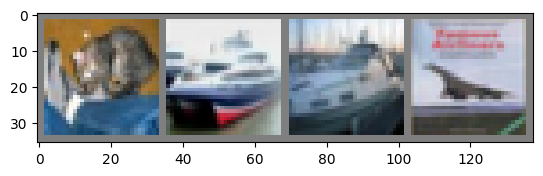

GroundTruth:  cat   ship  ship  plane


In [13]:
# Test data

dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [14]:
# predictions on test data
outputs = net(images)

In [16]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   car   car   plane


In [17]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 53 %


In [41]:
def train_model(net, trainloader, testloader, criterion, optimizer, epochs):
    # Move network to GPU
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    net = net.to(device)
    
    train_losses = []
    test_accuracies = []
    
    for epoch in range(epochs):
        running_loss = 0.0
        batch_count = 0
        # Training phase
        net.train()
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            # Move data to GPU
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            batch_count += 1

        # Calculate average loss for the epoch
        epoch_loss = running_loss / batch_count
        train_losses.append(epoch_loss)
            
            # if i % 2000 == 1999:
            #     print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            #     train_losses.append(running_loss / 2000)
            #     running_loss = 0.0
        
        # Testing phase
        correct = 0
        total = 0
        net.eval()
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                # Move data to GPU
                images, labels = images.to(device), labels.to(device)
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        accuracy = 100 * correct / total
        test_accuracies.append(accuracy)
        print(f'Epoch {epoch + 1} Loss: {epoch_loss:.3f} Accuracy: {accuracy:.2f}%')
    
    return train_losses, test_accuracies

def run_experiment(batch_size, learning_rate, momentum, epochs):
    # Reset network
    net = Net()
    
    # Create data loaders
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                            shuffle=True, num_workers=2)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                           shuffle=False, num_workers=2)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=momentum)
    
    return train_model(net, trainloader, testloader, criterion, optimizer, epochs)

In [29]:
# Store results
results = {}

# Configuration 1
print("Running Configuration 1...")
results['config1'] = run_experiment(batch_size=32, learning_rate=0.001, momentum=0.9, epochs=10)

# Configuration 2
print("Running Configuration 2...")
results['config2'] = run_experiment(batch_size=64, learning_rate=0.01, momentum=0.9, epochs=15)

# Configuration 3
print("Running Configuration 3...")
results['config3'] = run_experiment(batch_size=128, learning_rate=0.0005, momentum=0.95, epochs=20)

Running Configuration 1...
Epoch 1 Loss: 2.227 Accuracy: 29.25%
Epoch 2 Loss: 1.800 Accuracy: 39.16%
Epoch 3 Loss: 1.557 Accuracy: 46.33%
Epoch 4 Loss: 1.431 Accuracy: 50.47%
Epoch 5 Loss: 1.347 Accuracy: 52.25%
Epoch 6 Loss: 1.273 Accuracy: 54.73%
Epoch 7 Loss: 1.215 Accuracy: 56.39%
Epoch 8 Loss: 1.166 Accuracy: 58.74%
Epoch 9 Loss: 1.118 Accuracy: 59.26%
Epoch 10 Loss: 1.082 Accuracy: 60.39%
Running Configuration 2...
Epoch 1 Loss: 1.844 Accuracy: 45.72%
Epoch 2 Loss: 1.396 Accuracy: 52.83%
Epoch 3 Loss: 1.231 Accuracy: 57.06%
Epoch 4 Loss: 1.123 Accuracy: 59.51%
Epoch 5 Loss: 1.050 Accuracy: 59.99%
Epoch 6 Loss: 0.993 Accuracy: 62.04%
Epoch 7 Loss: 0.940 Accuracy: 60.79%
Epoch 8 Loss: 0.893 Accuracy: 63.09%
Epoch 9 Loss: 0.847 Accuracy: 62.21%
Epoch 10 Loss: 0.821 Accuracy: 62.13%
Epoch 11 Loss: 0.785 Accuracy: 61.88%
Epoch 12 Loss: 0.758 Accuracy: 64.04%
Epoch 13 Loss: 0.733 Accuracy: 62.06%
Epoch 14 Loss: 0.701 Accuracy: 63.39%
Epoch 15 Loss: 0.679 Accuracy: 63.01%
Running Config

In [22]:
# Configuration 4
print("Running Configuration 4...")
results['config4'] = run_experiment(batch_size=64, learning_rate=0.01, momentum=0.99, epochs=20)

# Configuration 5
print("Running Configuration 5...")
results['config5'] = run_experiment(batch_size=128, learning_rate=0.0001, momentum=0.9, epochs=10)

Running Configuration 4...
Epoch 1 Accuracy: 27.58%
Epoch 2 Accuracy: 34.54%
Epoch 3 Accuracy: 34.93%
Epoch 4 Accuracy: 31.14%
Epoch 5 Accuracy: 35.01%
Epoch 6 Accuracy: 34.50%
Epoch 7 Accuracy: 36.02%
Epoch 8 Accuracy: 31.58%
Epoch 9 Accuracy: 34.96%
Epoch 10 Accuracy: 31.83%
Epoch 11 Accuracy: 30.83%
Epoch 12 Accuracy: 30.19%
Epoch 13 Accuracy: 29.82%
Epoch 14 Accuracy: 29.60%
Epoch 15 Accuracy: 32.15%
Epoch 16 Accuracy: 30.51%
Epoch 17 Accuracy: 30.39%
Epoch 18 Accuracy: 26.40%
Epoch 19 Accuracy: 27.61%
Epoch 20 Accuracy: 27.10%
Running Configuration 5...
Epoch 1 Accuracy: 9.49%
Epoch 2 Accuracy: 9.71%
Epoch 3 Accuracy: 9.83%
Epoch 4 Accuracy: 9.97%
Epoch 5 Accuracy: 10.06%
Epoch 6 Accuracy: 10.14%
Epoch 7 Accuracy: 10.17%
Epoch 8 Accuracy: 10.29%
Epoch 9 Accuracy: 10.39%
Epoch 10 Accuracy: 10.50%


In [42]:
print(results)

([1.1499308102271135, 0.8347428216958594, 0.6967709194821166, 0.5978718004415712, 0.518234529915978, 0.4511334710871167, 0.38689102381086715, 0.34720817970497836, 0.3100601847824233, 0.20576478173132137], [68.22, 71.85, 72.32, 74.01, 76.55, 76.05, 76.24, 76.17, 76.89, 78.87])


In [25]:
# Configuration 6
print("Running Configuration 6...")
results['config6'] = run_experiment(batch_size=64, learning_rate=0.01, momentum=0.9, epochs=20)

Running Configuration 6...
Epoch 1 Accuracy: 45.68%
Epoch 2 Accuracy: 48.86%
Epoch 3 Accuracy: 57.79%
Epoch 4 Accuracy: 58.60%
Epoch 5 Accuracy: 59.67%
Epoch 6 Accuracy: 62.02%
Epoch 7 Accuracy: 60.74%
Epoch 8 Accuracy: 61.52%
Epoch 9 Accuracy: 62.70%
Epoch 10 Accuracy: 63.51%
Epoch 11 Accuracy: 61.93%
Epoch 12 Accuracy: 63.49%
Epoch 13 Accuracy: 62.49%
Epoch 14 Accuracy: 62.95%
Epoch 15 Accuracy: 62.76%
Epoch 16 Accuracy: 62.09%
Epoch 17 Accuracy: 62.26%
Epoch 18 Accuracy: 62.22%
Epoch 19 Accuracy: 62.03%
Epoch 20 Accuracy: 62.28%


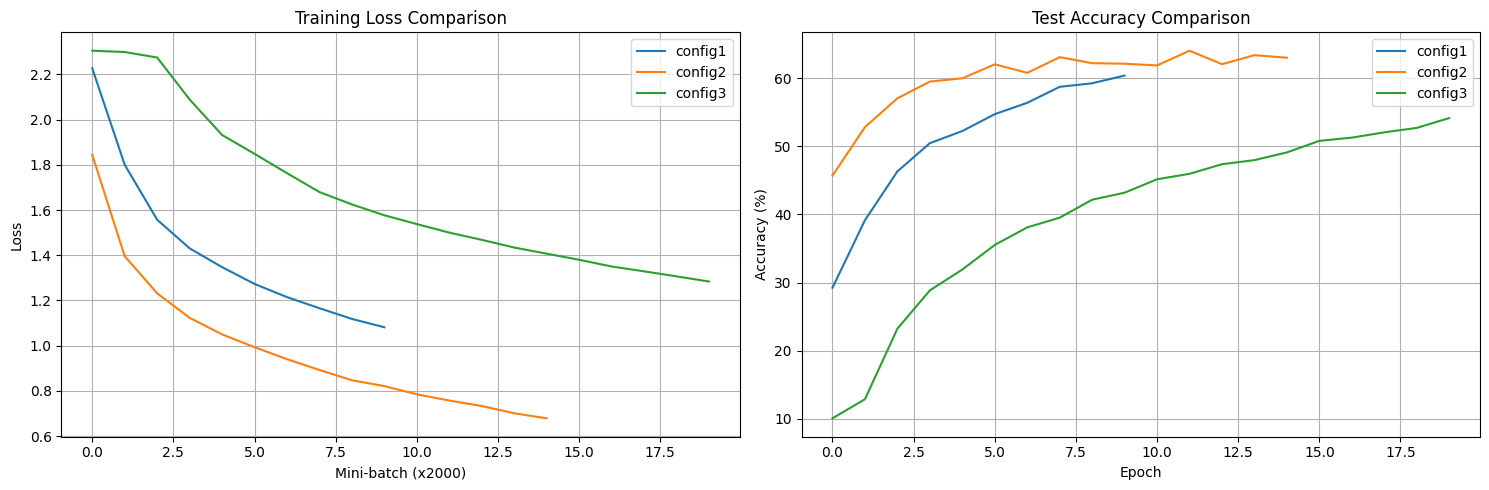

config1 final accuracy: 60.39%
config2 final accuracy: 63.01%
config3 final accuracy: 54.15%


In [31]:
plt.figure(figsize=(15, 5))

# Plot Training Losses
plt.subplot(1, 2, 1)
for config in ['config1', 'config2', 'config3']:
    plt.plot(results[config][0], label=f'{config}')
plt.title('Training Loss Comparison')
plt.xlabel('Mini-batch (x2000)')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Test Accuracies
plt.subplot(1, 2, 2)
for config in ['config1', 'config2', 'config3']:
    plt.plot(results[config][1], label=f'{config}')
plt.title('Test Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print final accuracies
for config in ['config1', 'config2', 'config3']:
    final_acc = results[config][1][-1]
    print(f"{config} final accuracy: {final_acc:.2f}%")

#### Question 12

In [43]:
class ImprovedNet(nn.Module):
    def __init__(self):
        super().__init__()
        # First conv block with residual
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv1_res = nn.Conv2d(3, 32, 1)  # 1x1 conv for residual
        
        # Second conv block with residual
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv2_res = nn.Conv2d(32, 64, 1)
        
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)
        
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc_bn = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        # First residual block
        identity = self.conv1_res(x)
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x + identity)
        x = self.pool(x)
        
        # Second residual block
        identity = self.conv2_res(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x + identity)
        x = self.pool(x)
        
        x = self.dropout(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc_bn(self.fc1(x)))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [44]:
def train_model_improved(net, trainloader, testloader, criterion, optimizer, scheduler, epochs):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    train_losses = []
    test_accuracies = []
    
    for epoch in range(epochs):
        # Training phase
        net.train()
        running_loss = 0.0
        for i, data in enumerate(trainloader):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
        epoch_loss = running_loss / len(trainloader)
        train_losses.append(epoch_loss)
        
        # Testing phase
        net.eval()
        correct = 0
        total = 0
        test_loss = 0.0
        
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                images, labels = images.to(device), labels.to(device)
                outputs = net(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        test_loss = test_loss / len(testloader)
        accuracy = 100 * correct / total
        test_accuracies.append(accuracy)
        
        # Update learning rate based on test loss
        scheduler.step(test_loss)
        
        print(f'Epoch {epoch + 1}:')
        print(f'Training Loss: {epoch_loss:.3f}')
        print(f'Test Loss: {test_loss:.3f}')
        print(f'Accuracy: {accuracy:.2f}%\n')
    
    return train_losses, test_accuracies


def run_experiment(batch_size, learning_rate, epochs):
    # Reset network
    net = ImprovedNet()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    net = net.to(device)
    
    # Create data loaders
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                            shuffle=True, num_workers=2)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                           shuffle=False, num_workers=2)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3)
    
    return train_model_improved(net, trainloader, testloader, criterion, optimizer, scheduler, epochs)

In [46]:
# Store results
results = {}

# Run the experiment
print("Running Configuration 1...")
results['config1'] = run_experiment(
    batch_size=64,
    learning_rate=0.01,
    epochs=15
)

Running Configuration 1...
Epoch 1:
Training Loss: 1.285
Test Loss: 1.022
Accuracy: 63.76%

Epoch 2:
Training Loss: 1.052
Test Loss: 1.020
Accuracy: 64.15%

Epoch 3:
Training Loss: 0.993
Test Loss: 0.932
Accuracy: 67.56%

Epoch 4:
Training Loss: 0.968
Test Loss: 0.985
Accuracy: 65.44%

Epoch 5:
Training Loss: 0.950
Test Loss: 0.914
Accuracy: 67.93%

Epoch 6:
Training Loss: 0.931
Test Loss: 0.925
Accuracy: 68.10%

Epoch 7:
Training Loss: 0.919
Test Loss: 0.834
Accuracy: 70.78%

Epoch 8:
Training Loss: 0.910
Test Loss: 0.853
Accuracy: 69.87%

Epoch 9:
Training Loss: 0.905
Test Loss: 0.871
Accuracy: 68.92%

Epoch 10:
Training Loss: 0.897
Test Loss: 0.890
Accuracy: 68.84%

Epoch 11:
Training Loss: 0.893
Test Loss: 0.815
Accuracy: 71.89%

Epoch 12:
Training Loss: 0.883
Test Loss: 0.811
Accuracy: 71.87%

Epoch 13:
Training Loss: 0.883
Test Loss: 0.834
Accuracy: 70.83%

Epoch 14:
Training Loss: 0.879
Test Loss: 0.845
Accuracy: 69.95%

Epoch 15:
Training Loss: 0.872
Test Loss: 0.788
Accuracy: 

In [47]:
print("Running Configuration 2...")
results['config2'] = run_experiment(
    batch_size=128,
    learning_rate=0.001,
    epochs=20
)

Running Configuration 2...
Epoch 1:
Training Loss: 1.152
Test Loss: 0.905
Accuracy: 67.51%

Epoch 2:
Training Loss: 0.838
Test Loss: 0.782
Accuracy: 72.54%

Epoch 3:
Training Loss: 0.703
Test Loss: 0.763
Accuracy: 73.56%

Epoch 4:
Training Loss: 0.603
Test Loss: 0.729
Accuracy: 74.83%

Epoch 5:
Training Loss: 0.518
Test Loss: 0.693
Accuracy: 75.97%

Epoch 6:
Training Loss: 0.458
Test Loss: 0.694
Accuracy: 75.94%

Epoch 7:
Training Loss: 0.400
Test Loss: 0.694
Accuracy: 76.65%

Epoch 8:
Training Loss: 0.346
Test Loss: 0.708
Accuracy: 76.62%

Epoch 9:
Training Loss: 0.316
Test Loss: 0.693
Accuracy: 77.41%

Epoch 10:
Training Loss: 0.208
Test Loss: 0.632
Accuracy: 79.08%

Epoch 11:
Training Loss: 0.177
Test Loss: 0.630
Accuracy: 79.05%

Epoch 12:
Training Loss: 0.161
Test Loss: 0.630
Accuracy: 79.30%

Epoch 13:
Training Loss: 0.151
Test Loss: 0.629
Accuracy: 79.43%

Epoch 14:
Training Loss: 0.139
Test Loss: 0.631
Accuracy: 79.38%

Epoch 15:
Training Loss: 0.130
Test Loss: 0.631
Accuracy: 

In [50]:
print("Running Configuration 3...")
results['config3'] = run_experiment(
    batch_size=256,
    learning_rate=0.0001,
    epochs=15
)

Running Configuration 3...
Epoch 1:
Training Loss: 1.499
Test Loss: 1.239
Accuracy: 56.39%

Epoch 2:
Training Loss: 1.182
Test Loss: 1.088
Accuracy: 62.26%

Epoch 3:
Training Loss: 1.041
Test Loss: 0.985
Accuracy: 65.48%

Epoch 4:
Training Loss: 0.943
Test Loss: 0.941
Accuracy: 67.22%

Epoch 5:
Training Loss: 0.871
Test Loss: 0.900
Accuracy: 69.19%

Epoch 6:
Training Loss: 0.807
Test Loss: 0.856
Accuracy: 70.27%

Epoch 7:
Training Loss: 0.755
Test Loss: 0.829
Accuracy: 71.41%

Epoch 8:
Training Loss: 0.712
Test Loss: 0.809
Accuracy: 72.34%

Epoch 9:
Training Loss: 0.666
Test Loss: 0.788
Accuracy: 72.53%

Epoch 10:
Training Loss: 0.631
Test Loss: 0.776
Accuracy: 72.84%

Epoch 11:
Training Loss: 0.595
Test Loss: 0.769
Accuracy: 73.44%

Epoch 12:
Training Loss: 0.561
Test Loss: 0.753
Accuracy: 73.59%

Epoch 13:
Training Loss: 0.530
Test Loss: 0.757
Accuracy: 73.74%

Epoch 14:
Training Loss: 0.502
Test Loss: 0.740
Accuracy: 74.15%

Epoch 15:
Training Loss: 0.473
Test Loss: 0.744
Accuracy: 

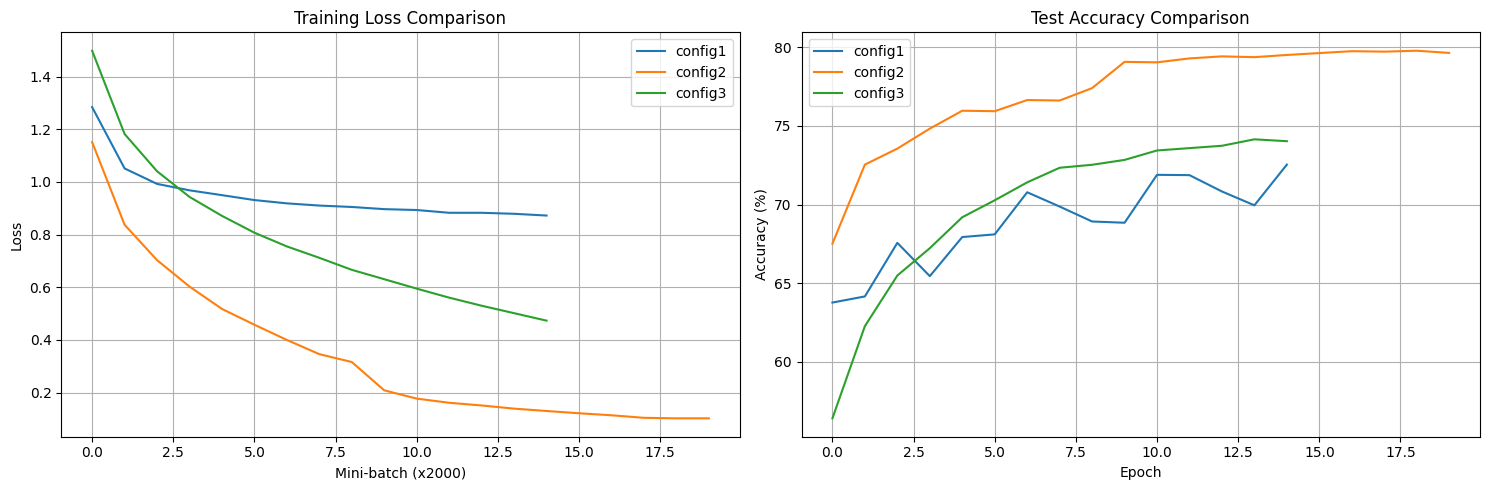

config1 final loss:  0.872 final accuracy: 72.54%
config2 final loss:  0.102 final accuracy: 79.65%
config3 final loss:  0.473 final accuracy: 74.03%


In [51]:
# # training and test curves
# plt.figure(figsize=(12, 4))

# plt.subplot(1, 2, 1)
# plt.plot(results[0])
# plt.title('Training Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')

# plt.subplot(1, 2, 2)
# plt.plot(results[1])
# plt.title('Test Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy (%)')

# plt.tight_layout()
# plt.show()
plt.figure(figsize=(15, 5))

# Plot Training Losses
plt.subplot(1, 2, 1)
for config in ['config1', 'config2', 'config3']:
    plt.plot(results[config][0], label=f'{config}')
plt.title('Training Loss Comparison')
plt.xlabel('Mini-batch (x2000)')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Test Accuracies
plt.subplot(1, 2, 2)
for config in ['config1', 'config2', 'config3']:
    plt.plot(results[config][1], label=f'{config}')
plt.title('Test Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print final accuracies
for config in ['config1', 'config2', 'config3']:
    final_acc = results[config][1][-1]
    loss = results[config][0][-1]
    print(f"{config} final loss: {loss: .3f} final accuracy: {final_acc:.2f}%")